<center><h1>DSCI 552 Machine Learning for Data Science HW8</h1></center>
<br>
<center> <font size="4">Name:Chung Ming Wu</font></center>

<center> <font size="4">USC_ID:7703568593</center>
    
<center> <font size="4">Github_Username:andywu96 </center>

## 1. Supervised, Semi-Supervised, and Unsupervised Learning
### 1-(a) Download the Breast Cancer Wisconsin (Diagnostic) Data Set from: https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+%28Diagnostic%29. Download the data in https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/wdbc.data, which has IDs, classes (Benign=B, Malignant=M), and 30 attributes. This data has two output classes.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# read dataframe
df = pd.read_table('../data/wdbc.data', sep=',', header = None)
df.columns = ['ID','class'] + ['feature%d'%i for i in range(1, df.shape[1] - 1)]
df.replace({'B' : 0, 'M' : 1}, inplace = True)
df

,ID,class,feature1,feature2,feature3,feature4,feature5,feature6,feature7,feature8,...,feature21,feature22,feature23,feature24,feature25,feature26,feature27,feature28,feature29,feature30
0,842302,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,842517,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,84300903,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,84348301,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,84358402,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,1,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,1,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,1,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,1,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [3]:
# Normalize the data 
from sklearn import preprocessing

X = df.iloc[:, 2:]
y = df.iloc[:, 1]

normlize_X = pd.DataFrame(preprocessing.normalize(X))
df = pd.concat([y, normlize_X], axis = 1)

## 1-(b) Monte-Carlo Simulation: 
### Repeat the following procedures for supervised, unsupervised, and semi-supervised learning M = 30 times, and use randomly selected train and test data (make sure you use 20% of both the positve and negative classes as the test set). Then compare the average scores (accuracy, precision, recall, F1-score, and AUC) that you obtain from each algorithm.

In [4]:
#Split the benign and malignant class
benign_data = []
malignant_data= []

# benign = 0 , malignant  = 1
for i in range(len(df)):
    if df['class'][i] == 0:
        benign_data.append(df.iloc[i,:])
    else:
        malignant_data.append(df.iloc[i,:])

benign_data = pd.DataFrame(benign_data)
malignant_data = pd.DataFrame(malignant_data)

## 1-(b)-(i) Supervised Learning:

### Train an L1-penalized SVM to classify the data. Use 5 fold cross validation to choose the penalty parameter. Use normalized data. Report the average accuracy, precision, recall, F1-score, and AUC, for both training and test sets over your M runs. Plot the ROC and report the confusion matrix for training and testing in one of the runs.

**Using GridsearchCV to get the best C in L1-penalized SVM**

In [5]:
from sklearn.svm import LinearSVC
from sklearn.model_selection import GridSearchCV, KFold
from sklearn.model_selection import StratifiedKFold

L1_SVM = LinearSVC(penalty = 'l1', dual = False, random_state = 0, tol = 0.1)
C_range = np.logspace(-1, 10, 10)
L1_params = {'C':C_range}
L1_grid = GridSearchCV(L1_SVM, param_grid = L1_params, cv = StratifiedKFold(5, shuffle = True))

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
from sklearn.metrics import roc_curve, roc_auc_score, confusion_matrix

# create a function to run all metrics in SVM
def SVM_metrics (X, y, L1_SVM, best_C, accuracy, recall, precision, f1 , AUC): 
    
    #Best SVM Penalty "C"
    best_params = L1_SVM.best_params_['C']
    best_C.append(best_params)
    
    #Accuracy
    y_pred = L1_SVM.predict(X)
    accuracy.append(accuracy_score(y, y_pred))
    
    #Recall
    recall.append(recall_score(y, y_pred))
    
    #Precision
    precision.append(precision_score(y, y_pred))
    
    #F1 score
    f1.append( f1_score(y, y_pred))

    #AUC value
    pred_proba = L1_SVM.decision_function(X)
    AUC.append(roc_auc_score(y, pred_proba))
    
    return best_C, accuracy, recall, precision, f1,  AUC

In [7]:
# list to store train and test metrics
best_C_train = []
best_C_test  = []
accuracy_train = []
accuracy_test = []
recall_train = []
recall_test = []
precision_train  = []
precision_test = []
f1_train  = []
f1_test = []
AUC_train = []
AUC_test = []

# running 30 times Monte-Carlo Simulation:
for i in range(30):

    # Get train data, test data
    train_benign , test_benign = train_test_split(benign_data, test_size = 0.2)
    train_malignant, test_malignant = train_test_split(malignant_data, test_size = 0.2)
    
    df_train = pd.concat([train_benign, train_malignant])
    df_test = pd.concat([test_benign, test_malignant])
    
    # Get X_train, X_test,  y_train,  y_test
    X_train = df_train.iloc[:, 1:]
    X_test = df_test.iloc[:, 1:]
    y_train = df_train.iloc[:, 0]
    y_test = df_test.iloc[:, 0]

    # Fit the model
    L1_SVM = L1_grid.fit(X_train, y_train)
    best_C_train, accuracy_train, recall_train, precision_train, f1_train, AUC_train = SVM_metrics(X_train, y_train, L1_SVM, best_C_train, accuracy_train, recall_train, precision_train, f1_train, AUC_train)
    
    best_C_test, accuracy_test, recall_test, precision_test, f1_test, AUC_test = SVM_metrics(X_test, y_test, L1_SVM, best_C_test, accuracy_test, recall_test, precision_test, f1_test, AUC_test )

**Training data in L1-penalized SVM with 30 times Monte-Carlo Simulation results**

In [8]:
# print the results
print('Average Best SVM Penalty "C":', round(np.mean(best_C_train),3))
print('Average Accuracy:', round(np.mean(accuracy_train),3))
print('Average Recall:', round(np.mean(recall_train),3))
print('Average Precision:', round(np.mean(precision_train),3))
print('Average F1 score:', round(np.mean(f1_train),3))
print('Average AUC score:', round(np.mean(AUC_train),3))

Average Best SVM Penalty "C": 101883.193
Average Accuracy: 0.954
Average Recall: 0.932
Average Precision: 0.943
Average F1 score: 0.937
Average AUC score: 0.993


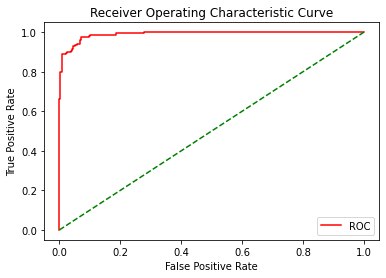

AUC_score of Train set for L1-penalized SVM :  0.9903664486660438


In [9]:
# Get the best run result
L1_SVM = L1_grid.fit(X_train, y_train)
y_pred_train = L1_SVM.predict(X_train)
pred_proba_train = L1_SVM.decision_function(X_train)

    
# Plot ROC Curve
f_pos, t_pos, thresholds = roc_curve(y_train, pred_proba_train)


#plt_roc_curve(fper, tper)
def plot_roc_curve(f_pos, t_pos):
    plt.plot(f_pos, t_pos, color='red', label='ROC')
    plt.plot([0, 1], [0, 1], color='green', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic Curve')
    plt.legend()
    plt.show()
    
plot_roc_curve(f_pos, t_pos)
print('AUC_score of Train set for L1-penalized SVM : ', roc_auc_score(y_train, pred_proba_train))

In [10]:
# Confusion Matrix
# label 0 = Benign=B,  
# label 1 = Malignant=M
pd.crosstab(y_train, y_pred_train)

col_0,0.0,1.0
class,,
0.0,278,7
1.0,17,152


**Testing data in L1-penalized SVM with 30 times Monte-Carlo Simulation results**

In [11]:
# print the results
print('Average Best SVM Penalty "C":', round(np.mean(best_C_test),3))
print('Average Accuracy:', round(np.mean(accuracy_test),3))
print('Average Recall:', round(np.mean(recall_test),3))
print('Average Precision:', round(np.mean(precision_test),3))
print('Average F1 score:', round(np.mean(f1_test),3))
print('Average AUC score:', round(np.mean(AUC_test),3))

Average Best SVM Penalty "C": 101883.193
Average Accuracy: 0.943
Average Recall: 0.92
Average Precision: 0.93
Average F1 score: 0.924
Average AUC score: 0.987


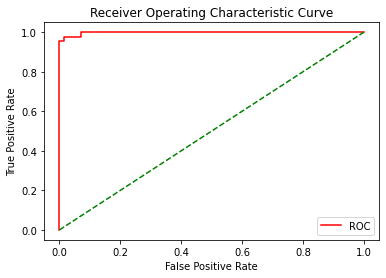

AUC_score of Train set for L1-penalized SVM :  0.998062015503876


In [12]:
# Get the best run result
L1_SVM = L1_grid.fit(X_test, y_test)
y_pred_test = L1_SVM.predict(X_test)
pred_proba_test = L1_SVM.decision_function(X_test)

    
# Plot ROC Curve
f_pos, t_pos, thresholds = roc_curve(y_test, pred_proba_test)


#plt_roc_curve(fper, tper)
def plot_roc_curve(f_pos, t_pos):
    plt.plot(f_pos, t_pos, color='red', label='ROC')
    plt.plot([0, 1], [0, 1], color='green', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic Curve')
    plt.legend()
    plt.show()
    
plot_roc_curve(f_pos, t_pos)
print('AUC_score of Train set for L1-penalized SVM : ', roc_auc_score(y_test, pred_proba_test))

In [13]:
# Confusion Matrix
# label 0 = Benign=B,  
# label 1 = Malignant=M
pd.crosstab(y_test, y_pred_test)

col_0,0.0,1.0
class,,
0.0,71,1
1.0,1,42


## 1-(b)-(ii) Semi-Supervised Learning/ Self-training: 
### Select 50% of the positive class along with 50% of the negative class in the training set as labeled data and the rest as unlabelled data. You can select them randomly.

### 1-(b)-(ii)-(A) Train an L1-penalized SVM to classify the labeled data Use normalized data. Choose the penalty parameter using 5 fold cross validation.

### 1-(b)-(ii)-(B) Find the unlabeled data point that is the farthest to the decision boundary of the SVM. Let the SVM label it (ignore its true label), and add it to the labeled data, and retrain the SVM. Continue this process until all unlabeled data are used. Test the final SVM on the test data and the average accuracy, precision, recall, F1-score, and AUC, for both training and test sets over your M runs. Plot the ROC and report the confusion matrix for training and testing in one of the runs.

In [14]:
best_C_train_2 = []
best_C_test_2  = []
accuracy_train_2 = []
accuracy_test_2 = []
recall_train_2 = []
recall_test_2 = []
precision_train_2  = []
precision_test_2 = []
f1_train_2  = []
f1_test_2 = []
AUC_train_2 = []
AUC_test_2 = []

L1_SVM_2 = LinearSVC(penalty = 'l1', dual = False, random_state = 0, tol = 0.1)
C_range = np.logspace(-1, 10, 10)
L1_params = {'C':C_range}
L1_grid_2 = GridSearchCV(L1_SVM_2, param_grid = L1_params, cv = StratifiedKFold(5, shuffle = True))

#Running 30 times Monte-Carlo Simulation:
for i in range(30):
    
    # Get train data, test data
    train_benign, test_benign = train_test_split(benign_data, test_size = 0.2)
    train_malignant, test_malignant = train_test_split(malignant_data, test_size = 0.2)
        
    df_train = pd.concat([train_benign, train_malignant])
    df_test = pd.concat([test_benign, test_malignant])
    
    # Get X_train, X_test,  y_train,  y_test
    X_train = df_train.iloc[:, 1:]
    X_test = df_test.iloc[:, 1:]
    y_train = df_train.iloc[:, 0]
    y_test = df_test.iloc[:, 0]
    
    # Separate labeled_data and unlabeled data from train set
    labeled_data, unlabeled_data = train_test_split(df_train, test_size = 0.5, stratify = y_train ) 

    # Get X_label, y_label, X_unlabel, y_unlabel
    X_label = labeled_data.iloc[:, 1:]
    y_label = labeled_data.iloc[:, 0]
    X_unlabel = unlabeled_data.iloc[:, 1:]
    y_unlabel = unlabeled_data.iloc[:, 0]
    
    #Fit the model
    L1_SVM_2 = L1_grid_2.fit(X_label, y_label)
    
    while len(X_unlabel) > 0:
        
        #Calculate distance from unlabeled data points to decision boundary
        distances = L1_SVM_2.decision_function(X_unlabel)

        #Sort by the absolute value of score
        sorted_index = sorted([i for i in range(len(X_unlabel))], key = lambda x : abs(distances[x]), reverse = True)
        farthest_point = sorted_index[0]
        farthest_X = pd.DataFrame(X_unlabel.iloc[farthest_point,:])
        farthest_y = pd.Series(y_unlabel.iloc[farthest_point])
        
        #Remove the farest point from unlabeled and add it to label data 
        X_label = pd.concat([X_label, farthest_X.T])
        y_label = pd.concat([y_label, farthest_y])
        droped_index = X_unlabel.index[farthest_point]
        X_unlabel = X_unlabel.drop(index = droped_index)
        
        #Refit the SVC
        L1_SVM_2 = L1_grid_2.fit(X_label, y_label)
        
    best_C_train_2, accuracy_train_2, recall_train_2, precision_train_2, f1_train_2, AUC_train_2 = SVM_metrics(X_train, y_train, L1_SVM_2, best_C_train_2, accuracy_train_2, recall_train_2, precision_train_2, f1_train_2, AUC_train_2)
    best_C_test_2, accuracy_test_2, recall_test_2, precision_test_2, f1_test_2, AUC_test_2 = SVM_metrics(X_test, y_test, L1_SVM_2, best_C_test_2, accuracy_test_2, recall_test_2, precision_test_2, f1_test_2, AUC_test_2 )

**Training data in Semi-Supervised Learning L1-penalized SVM with 30 times Monte-Carlo Simulation results**

In [15]:
# print the results
print('Average Best SVM Penalty "C":', round(np.mean(best_C_train_2),3))
print('Average Accuracy:', round(np.mean(accuracy_train_2),3))
print('Average Recall:', round(np.mean(recall_train_2),3))
print('Average Precision:', round(np.mean(precision_train_2),3))
print('Average F1 score:', round(np.mean(f1_train_2),3))
print('Average AUC score:', round(np.mean(AUC_train_2),3))

Average Best SVM Penalty "C": 1374333.326
Average Accuracy: 0.908
Average Recall: 0.771
Average Precision: 0.979
Average F1 score: 0.858
Average AUC score: 0.983


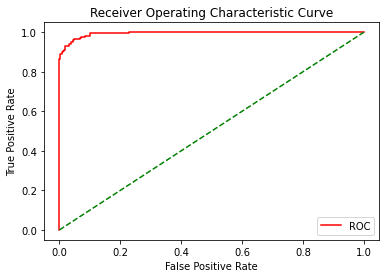

AUC_score of Train set for L1-penalized SVM :  0.99412436416485


In [16]:
# Get the best run result
L1_SVM_2 = L1_grid.fit(X_train, y_train)
y_pred_train = L1_SVM_2.predict(X_train)
pred_proba_train = L1_SVM_2.decision_function(X_train)

    
# Plot ROC Curve
f_pos, t_pos, thresholds = roc_curve(y_train, pred_proba_train)


#plt_roc_curve(fper, tper)
def plot_roc_curve(f_pos, t_pos):
    plt.plot(f_pos, t_pos, color='red', label='ROC')
    plt.plot([0, 1], [0, 1], color='green', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic Curve')
    plt.legend()
    plt.show()
    
plot_roc_curve(f_pos, t_pos)
print('AUC_score of Train set for L1-penalized SVM : ', roc_auc_score(y_train, pred_proba_train))

In [17]:
# Confusion Matrix
# label 0 = Benign=B,  
# label 1 = Malignant=M
pd.crosstab(y_train, y_pred_train)

col_0,0.0,1.0
class,,
0.0,274,11
1.0,9,160


**Testing data in Semi-Supervised Learning L1-penalized SVM with 30 times Monte-Carlo Simulation results**

In [18]:
# print the results
print('Average Best SVM Penalty "C":', round(np.mean(best_C_test_2),3))
print('Average Accuracy:', round(np.mean(accuracy_test_2),3))
print('Average Recall:', round(np.mean(recall_test_2),3))
print('Average Precision:', round(np.mean(precision_test_2),3))
print('Average F1 score:', round(np.mean(f1_test_2),3))
print('Average AUC score:', round(np.mean(AUC_test_2),3))

Average Best SVM Penalty "C": 1374333.326
Average Accuracy: 0.909
Average Recall: 0.77
Average Precision: 0.984
Average F1 score: 0.858
Average AUC score: 0.981


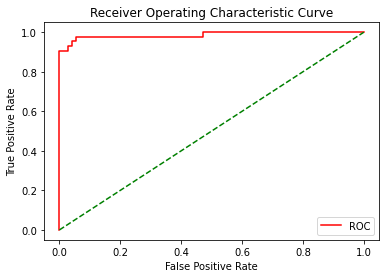

AUC_score of Train set for L1-penalized SVM :  0.986111111111111


In [19]:
# Get the best run result
#L1_SVM_2 = L1_grid.fit(X_test, y_test)
y_pred_test_2 = L1_SVM_2.predict(X_test)
pred_proba_test_2 = L1_SVM_2.decision_function(X_test)

    
# Plot ROC Curve
f_pos, t_pos, thresholds = roc_curve(y_test, pred_proba_test_2)


#plt_roc_curve(fper, tper)
def plot_roc_curve(f_pos, t_pos):
    plt.plot(f_pos, t_pos, color='red', label='ROC')
    plt.plot([0, 1], [0, 1], color='green', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic Curve')
    plt.legend()
    plt.show()
    
plot_roc_curve(f_pos, t_pos)
print('AUC_score of Train set for L1-penalized SVM : ', roc_auc_score(y_test, pred_proba_test_2))

In [20]:
# Confusion Matrix
# label 0 = Benign=B,  
# label 1 = Malignant=M
pd.crosstab(y_test, y_pred_test_2)

col_0,0.0,1.0
class,,
0.0,68,4
1.0,1,42


## 1-(b)-(iii) Unsupervised Learning:
###  Run k-means algorithm on the whole training set. Ignore the labels of the data, and assume k = 2.

### 1-(b)-(iii)-(A) Run the k-means algorithm multiple times. Make sure that you initialize the algoritm randomly. How do you make sure that the algorithm was not trapped in a local minimum?

**To avoid local minimal I use n_init = 100 and init = "random".**

Given kmeans iterative nature and the random initialization of centroids at the start of the algorithm, different initializations may lead to different clusters since kmeans algorithm may stuck in a local optimum and may not converge to global optimum. Therefore, it is better to run the algorithm using different initializations of centroids and pick the results of the run that that yielded the lower sum of squared distance.

### 1-(b)-(iii)-(B) Compute the centers of the two clusters and find the closest 30 data points to each center. Read the true labels of those 30 data points and take a majority poll within them. The majority poll becomes the label predicted by k-means for the members of each cluster. Then compare the labels provided by k-means with the true labels of the training data and report the average accuracy, precision, recall, F1-score, and AUC over M runs, and ROC and the confusion matrix for one of the runs.

In [21]:
# create a function to run all metrics in k-means
def kmeans_metrics (X, y, y_pred, k_means, accuracy, recall, precision, f1 , AUC): 
    
    #Accuracy
    accuracy.append(accuracy_score(y, y_pred))
    
    #Recall
    recall.append(recall_score(y, y_pred))
    
    #Precision
    precision.append(precision_score(y, y_pred))
    
    #F1 score
    f1.append(f1_score(y, y_pred))

    #AUC value - Using Gaussian Mixture Models to get the proba in Kmeans
    clf = GaussianMixture(n_components = 2,  
                          means_init = k_means.cluster_centers_ ).fit(X)
    pred_proba = clf.predict_proba(X)[::,1]
    auc_score = roc_auc_score(y, pred_proba)
    if  auc_score <= 0.2:
        AUC.append(1-auc_score)
    else:
        AUC.append(auc_score)
    
    return accuracy, recall, precision, f1,  AUC

In [22]:
# A function to update label after majority pull
def change_label(x,y):
    x2 = x.copy()
    for i in range(len(x2)):
        if x2[i] == 0:
            x2[i] = y[0]
        else:
            x2[i] = y[1]
    return x2

In [23]:
import operator
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from sklearn.metrics.pairwise import euclidean_distances
#from sklearn.metrics import RocCurveDisplay

accuracy_train_kmeans = []
accuracy_test_kmeans = []
recall_train_kmeans = []
recall_test_kmeans = []
precision_train_kmeans  = []
precision_test_kmeans = []
f1_train_kmeans  = []
f1_test_kmeans = []
AUC_train_kmeans = []
AUC_test_kmeans = []


#Running 30 times Monte-Carlo Simulation:
for t in range(30):
    
    cluster_majority = []

    # Get train data, test data
    train_benign, test_benign = train_test_split(benign_data, test_size = 0.2, random_state = t )
    train_malignant, test_malignant = train_test_split(malignant_data, test_size = 0.2, random_state = t )
        
    df_train = pd.concat([train_benign, train_malignant])
    df_test = pd.concat([test_benign, test_malignant])
    
    # Get X_train, X_test,  y_train,  y_test
    X_train = df_train.iloc[:, 1:]
    X_test = df_test.iloc[:, 1:]
    y_train = df_train.iloc[:, 0]
    y_test = df_test.iloc[:, 0]
    
    #Construct the model
    k_means = KMeans(n_clusters = 2, init = 'random', n_init =  100, random_state = 1).fit(X_train)  # build kmeans cluster with k = 2 
    
    cluster_center = k_means.cluster_centers_
    distances = euclidean_distances(X_train, cluster_center)

    cluster1_distance = {}
    cluster2_distance = {}
    
    for i in range(len(X_train)):
        cluster1_distance[y_train.index[i]] = distances[i][0]
        cluster2_distance[y_train.index[i]] = distances[i][1]
    
    sorted_cluster1 = sorted(cluster1_distance.items(), key = operator.itemgetter(1))
    sorted_cluster2 = sorted(cluster2_distance.items(), key = operator.itemgetter(1))
    
    #Find the Majority of First Cluster 
    cluster1_label = {}
    for i in range(30):
        index = sorted_cluster1[i][0]
        label = y[index]
        if label in cluster1_label.keys():
            cluster1_label[label] += 1
        else:
            cluster1_label[label] = 1
            
    sorted_cluster1_label = sorted(cluster1_label.items(), key = operator.itemgetter(1), reverse = True)
    cluster1_majority = sorted_cluster1_label[0][0]
    
    #Find the Majority of Second Cluster
    cluster2_label = {}
    for i in range(30):
        index = sorted_cluster2[i][0]
        label = y[index]
        if label in cluster2_label.keys():
            cluster2_label[label] += 1
        else:
            cluster2_label[label] = 1
            
    sorted_cluster2_label = sorted(cluster2_label.items(), key = operator.itemgetter(1), reverse = True)
    cluster2_majority = sorted_cluster2_label[0][0]
    
    # record each cluster majority
    cluster_majority.append(cluster1_majority)
    cluster_majority.append(cluster2_majority)
    
    # update label after majority pull
    final_label  = change_label(k_means.labels_, cluster_majority)
    accuracy_train_kmeans, recall_train_kmeans, precision_train_kmeans, f1_train_kmeans, AUC_train_kmeans = kmeans_metrics(X_train, y_train,  final_label , k_means, accuracy_train_kmeans, recall_train_kmeans, precision_train_kmeans, f1_train_kmeans, AUC_train_kmeans)

    #Test Data
    y_pred_test  = k_means.predict(X_test)
    final_label_test  = change_label(y_pred_test, cluster_majority)
    accuracy_test_kmeans, recall_test_kmeans, precision_test_kmeans, f1_test_kmeans, AUC_test_kmeans = kmeans_metrics(X_test, y_test, final_label_test, k_means, accuracy_test_kmeans, recall_test_kmeans, precision_test_kmeans, f1_test_kmeans, AUC_test_kmeans)

**Training data in Unsupervised Learning- Kmeans with 30 times Monte-Carlo Simulation results**

In [24]:
# print the Train results

print('Average Accuracy:', round(np.mean(accuracy_train_kmeans),3))
print('Average Recall:', round(np.mean(recall_train_kmeans),3))
print('Average Precision:', round(np.mean(precision_train_kmeans),3))
print('Average F1 score:', round(np.mean(f1_train_kmeans),3))
print('Average AUC score:', round(np.mean(AUC_train_kmeans),3))

Average Accuracy: 0.886
Average Recall: 0.728
Average Precision: 0.957
Average F1 score: 0.826
Average AUC score: 0.83


**Training results in 1 Monte-Carlo Simulation run**

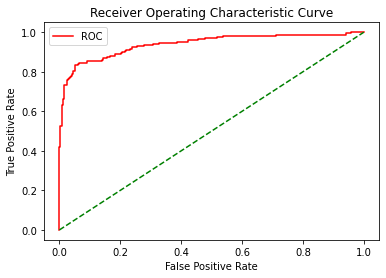

AUC_score of Train set for k-means model :  0.9401224955880826


In [25]:
# Plot ROC Curve
clf = GaussianMixture(n_components = 2,random_state = 1).fit(X_train)
pred_proba_kmeans = clf.predict_proba(X_train)[::,1]
f_pos, t_pos, thresholds = roc_curve(y_train, pred_proba_kmeans)

#plt_roc_curve(fper, tper)
def plot_roc_curve(f_pos, t_pos):
    plt.plot(f_pos, t_pos, color='red', label='ROC')
    plt.plot([0, 1], [0, 1], color='green', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic Curve')
    plt.legend()
    plt.show()
    
plot_roc_curve(f_pos, t_pos)
print('AUC_score of Train set for k-means model : ', roc_auc_score(y_train, pred_proba_kmeans))

In [26]:
# Confusion Matrix
# label 0 = Benign=B,  
# label 1 = Malignant=M
pd.crosstab(y_train, final_label)

col_0,0,1
class,,
0.0,281,4
1.0,49,120


### 1-(b)-(iii)-(C) Classify test data based on their proximity to the centers of the clusters. Report the average accuracy, precision, recall, F1-score, and AUC over M runs, and ROC and the confusion matrix for one of the runs for the test data.

K-means algorithm does not provide probabilities, so one can use the distances from cluster center and
pass them through a softmax to calculate probabilities. Alternatively, one can calculate the ROC curve by
varying the threshold for majority polling. Usually, a majority is achieved when t = 50% of the data are in
a class. one can vary t and obtain an ROC curve.

**Testing data in Unsupervised Learning- Kmeans with 30 times Monte-Carlo Simulation results**

In [27]:
# print the Train results

print('Average Accuracy:', round(np.mean(accuracy_test_kmeans),3))
print('Average Recall:', round(np.mean(recall_test_kmeans),3))
print('Average Precision:', round(np.mean(precision_test_kmeans),3))
print('Average F1 score:', round(np.mean(f1_test_kmeans),3))
print('Average AUC score:', round(np.mean(AUC_test_kmeans),3))

Average Accuracy: 0.89
Average Recall: 0.733
Average Precision: 0.965
Average F1 score: 0.831
Average AUC score: 0.882


**Testing results in 1 Monte-Carlo Simulation run**

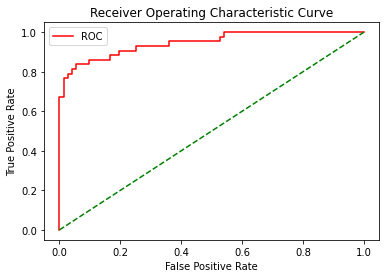

AUC_score of Test set for k-means model:  0.9460594315245479


In [28]:
# Plot ROC Curve
pred_proba_kmeans_test = clf.predict_proba(X_test)[::,1]
f_pos, t_pos, thresholds = roc_curve(y_test, pred_proba_kmeans_test)

#plt_roc_curve(fper, tper)
def plot_roc_curve(f_pos, t_pos):
    plt.plot(f_pos, t_pos, color='red', label='ROC')
    plt.plot([0, 1], [0, 1], color='green', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic Curve')
    plt.legend()
    plt.show()
    
plot_roc_curve(f_pos, t_pos)
print('AUC_score of Test set for k-means model: ', roc_auc_score(y_test, pred_proba_kmeans_test))

In [29]:
# Confusion Matrix
# label 0 = Benign=B,  
# label 1 = Malignant=M
pd.crosstab(y_test, final_label_test)

col_0,0,1
class,,
0.0,70,2
1.0,12,31


## 1-(b)-(iv) Spectral Clustering:
### Repeat 1(b)iii using spectral clustering, which is clustering based on kernels. Research what spectral clustering is. Use RBF kernel with gamma=1 or find a gamma for which the two clutsres have the same balance as the one in original data set (if the positive class has p and the negative class has n samples, the two clusters must have p and n members). Do not label data based on their proximity to cluster center, because spectral clustering may give you non-convex clusters . Instead, use fit_predict method.

Because Spectral Clustering will not give you cluster centers, instead of considering 30 closest data points
to the center, consider labeling based on either 30 randomly selected data points or the entire points in each
cluster. Also, for ROC curves, you can vary the threshold of majority polling to obtain an ROC.

In [30]:
# create a function to run all metrics in Spectral Clustering
def spectral_metrics(X, y, y_pred, k_means, accuracy, recall, precision, f1 , AUC): 
    
    #Accuracy
    accuracy.append(accuracy_score(y, y_pred))
    
    #Recall
    recall.append(recall_score(y, y_pred))
    
    #Precision
    precision.append(precision_score(y, y_pred))
    
    #F1 score
    f1.append(f1_score(y, y_pred))
    
    #AUC value - Using Gaussian Mixture Models to get the proba in Kmeans
    clf = GaussianMixture(n_components = 2, covariance_type = 'spherical').fit(X)
    pred_proba = clf.predict_proba(X)[::,1]
    auc_score = roc_auc_score(y, pred_proba)
    if  auc_score <= 0.2:
        AUC.append(1-auc_score)
    else:
        AUC.append(auc_score)
    
    return accuracy, recall, precision, f1,  AUC

In [31]:
from sklearn.cluster import SpectralClustering

accuracy_train_spectral = []
accuracy_test_spectral = []
recall_train_spectral = []
recall_test_spectral = []
precision_train_spectral  = []
precision_test_spectral = []
f1_train_spectral  = []
f1_test_spectral = []
AUC_train_spectral = []
AUC_test_spectral = []

for t in range(30):
    
    cluster_majority_spectral = []
    cluster_majority_spectral_test = []
    
    # Get train data, test data
    train_benign, test_benign = train_test_split(benign_data, test_size = 0.2)
    train_malignant, test_malignant = train_test_split(malignant_data, test_size = 0.2)
        
    df_train = pd.concat([train_benign, train_malignant])
    df_test = pd.concat([test_benign, test_malignant])
    
    # Get X_train, X_test,  y_train,  y_test
    X_train = df_train.iloc[:, 1:]
    X_test = df_test.iloc[:, 1:]
    y_train = df_train.iloc[:, 0]
    y_test = df_test.iloc[:, 0]
    
    # Fit the model
    spectral_cluster = SpectralClustering(n_clusters = 2, affinity = 'rbf', gamma = 1.0, eigen_tol = 1.0, assign_labels ='discretize')
    labels_train = spectral_cluster.fit_predict(X_train)
    
    #Use the Majority pull for all train set of cluster
    cluster1_label_spectral = {}
    cluster2_label_spectral = {}
    
    for i in range(len(labels_train)):
        
        #cluster1 
        if labels_train[i] == 0:
            number = y_train.index[i] 
            index_1 = y[number]
            if index_1 in cluster1_label_spectral.keys():
                cluster1_label_spectral[index_1] += 1
            else:
                cluster1_label_spectral[index_1] = 1
                
        #cluster2 
        else:
            number = y_train.index[i] 
            index_2 = y[number]
            if index_2 in cluster2_label_spectral.keys():
                cluster2_label_spectral[index_2] += 1
            else:
                cluster2_label_spectral[index_2] = 1            
    
    sorted_cluster1_label_spectral = sorted(cluster1_label_spectral.items(), key = operator.itemgetter(1), reverse = True)
    cluster1_majority_spectral = sorted_cluster1_label_spectral[0][0]
    sorted_cluster2_label_spectral = sorted(cluster2_label_spectral.items(), key = operator.itemgetter(1), reverse = True)
    cluster2_majority_spectral = sorted_cluster2_label_spectral[0][0]

    # record each cluster majority
    cluster_majority_spectral.append(cluster1_majority_spectral)
    cluster_majority_spectral.append(cluster2_majority_spectral)
    
    # update label after majority pull
    final_label_spectral  = change_label(labels_train, cluster_majority_spectral)
    
    # Train data
    accuracy_train_spectral, recall_train_spectral, precision_train_spectral, f1_train_spectral, AUC_train_spectral = spectral_metrics(X_train, y_train, final_label_spectral, spectral_cluster, accuracy_train_spectral, recall_train_spectral, precision_train_spectral, f1_train_spectral, AUC_train_spectral)
    
    #Test Data
    labels_test = spectral_cluster.fit_predict(X_test)
    
    #Use the Majority pull for test set of cluster
    cluster1_label_spectral_test = {}
    cluster2_label_spectral_test = {}
    
    for i in range(len(labels_test)):
        
        #cluster1 
        if labels_test[i] == 0:
            number = y_test.index[i] 
            index_1 = y[number]
            if index_1 in cluster1_label_spectral_test.keys():
                cluster1_label_spectral_test[index_1] += 1
            else:
                cluster1_label_spectral_test[index_1] = 1
                
        #cluster2 
        else:
            number = y_test.index[i] 
            index_2 = y[number]
            if index_2 in cluster2_label_spectral_test.keys():
                cluster2_label_spectral_test[index_2] += 1
            else:
                cluster2_label_spectral_test[index_2] = 1            
    
    sorted_cluster1_label_spectral_test = sorted(cluster1_label_spectral_test.items(), key = operator.itemgetter(1), reverse = True)
    cluster1_majority_spectral_test = sorted_cluster1_label_spectral_test[0][0]
    sorted_cluster2_label_spectral_test = sorted(cluster2_label_spectral_test.items(), key = operator.itemgetter(1), reverse = True)
    cluster2_majority_spectral_test = sorted_cluster2_label_spectral_test[0][0]

    # record each cluster majority
    cluster_majority_spectral_test.append(cluster1_majority_spectral_test)
    cluster_majority_spectral_test.append(cluster2_majority_spectral_test)
    
    # update label after majority pull    
    final_label_spectral_test  = change_label(labels_test, cluster_majority_spectral_test)
    
    accuracy_test_spectral, recall_test_spectral, precision_test_spectral, f1_test_spectral, AUC_test_spectral = spectral_metrics(X_test, y_test, final_label_spectral_test, spectral_cluster, accuracy_test_spectral, recall_test_spectral, precision_test_spectral, f1_test_spectral, AUC_test_spectral)

**Training data in Spectral Clustering-Kmeans with 30 times Monte-Carlo Simulation results**

In [32]:
# print the Train results

print('Average Accuracy:', round(np.mean(accuracy_train_spectral),3))
print('Average Recall:', round(np.mean(recall_train_spectral),3))
print('Average Precision:', round(np.mean(precision_train_spectral),3))
print('Average F1 score:', round(np.mean(f1_train_spectral),3))
print('Average AUC score:', round(np.mean(AUC_train_spectral),3))

Average Accuracy: 0.9
Average Recall: 0.817
Average Precision: 0.905
Average F1 score: 0.859
Average AUC score: 0.94


**Training results in 1 Monte-Carlo Simulation run**

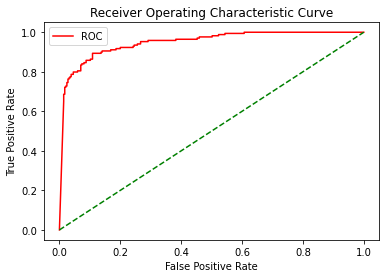

AUC_score of Train set for Spectral Clustering- Kmeans :  0.9489255683587667


In [33]:
# Plot ROC Curve
clf = GaussianMixture(n_components = 2, covariance_type = 'spherical', random_state = 1).fit(X_train)
pred_proba_spectral_train = clf.predict_proba(X_train)[::,1]
f_pos, t_pos, thresholds = roc_curve(y_train, pred_proba_spectral_train)

#plt_roc_curve(fper, tper)
def plot_roc_curve(f_pos, t_pos):
    plt.plot(f_pos, t_pos, color='red', label='ROC')
    plt.plot([0, 1], [0, 1], color='green', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic Curve')
    plt.legend()
    plt.show()
    
plot_roc_curve(f_pos, t_pos)
print('AUC_score of Train set for Spectral Clustering- Kmeans : ', roc_auc_score(y_train, pred_proba_spectral_train))

In [34]:
# Confusion Matrix
# label 0 = Benign=B,  
# label 1 = Malignant=M
pd.crosstab(y_train, final_label_spectral)

col_0,0,1
class,,
0.0,271,14
1.0,32,137


**Testing data in Spectral Clustering- Kmeans with 30 times Monte-Carlo Simulation results**

In [35]:
# print the Test results

print('Average Accuracy:', round(np.mean(accuracy_test_spectral),3))
print('Average Recall:', round(np.mean(recall_test_spectral),3))
print('Average Precision:', round(np.mean(precision_test_spectral),3))
print('Average F1 score:', round(np.mean(f1_test_spectral),3))
print('Average AUC score:', round(np.mean(AUC_test_spectral),3))

Average Accuracy: 0.896
Average Recall: 0.813
Average Precision: 0.902
Average F1 score: 0.853
Average AUC score: 0.934


**Testing results in 1 Monte-Carlo Simulation run**

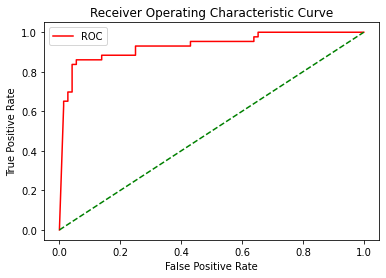

AUC_score of Test set for Spectral Clustering- Kmeans  :  0.9320090439276485


In [36]:
# Plot ROC Curve 
pred_proba_spectral_test = clf.predict_proba(X_test)[::,1]
f_pos, t_pos, thresholds = roc_curve(y_test, pred_proba_spectral_test)

#plt_roc_curve(fper, tper)
def plot_roc_curve(f_pos, t_pos):
    plt.plot(f_pos, t_pos, color='red', label='ROC')
    plt.plot([0, 1], [0, 1], color='green', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic Curve')
    plt.legend()
    plt.show()
    
plot_roc_curve(f_pos, t_pos)
print('AUC_score of Test set for Spectral Clustering- Kmeans  : ', roc_auc_score(y_test, pred_proba_spectral_test))

In [37]:
# Confusion Matrix
# label 0 = Benign=B,  
# label 1 = Malignant=M
pd.crosstab(y_test, final_label_spectral_test)

col_0,0,1
class,,
0.0,68,4
1.0,7,36


### 1-(b)-(v)  One can expect that supervised learning on the full data set works better than semi-supervised learning with half of the data set labeled.One can expect that unsupervised learning underperforms in such situations. Compare the results you obtained by those methods.

**According to the average scores of accuracy, precision, recall, F1-score and AUC in supervised learning on the full data set works better than semi-supervised learning and unsupervised learning. All test metrics in supervised learning are 90% above; In semi-supervised learning, some test metrics like Recall and Precision drop to below 90%; In Unsupervised learning with K-means k=2 are slightly less than semi-supervised Learning.**

## 2. Active Learning Using Support Vector Machines
### 2-(a) Download the banknote authentication Data Set from: https://archive.ics.uci.edu/ml/datasets/banknote+authentication. Choose 472 data points randomly as the test set, and the remaining 900 points as the training set. This is a binary classification problem.

In [38]:
import numpy as np, pandas as pd 
data = pd.read_table('../data/data_banknote_authentication.txt', sep=',', header = None)

In [39]:
from sklearn.model_selection import train_test_split

# Randomly get the train set and test set,
train_set, test_set = train_test_split(data, train_size = 900)

#Separate X_test, y_test
X_test = test_set.iloc[:,:4]
y_test = test_set.iloc[:, 4]

### 2-(b) Repeat each of the following two procedures 50 times. You will have 50 errors for 90 SVMs per each procedure.

### 2-(b)-(i) Train a SVM with a pool of 10 randomly selected data points from the training set using linear kernel and L1 penalty. Select the penalty parameter using 5-fold cross validation. Repeat this process by adding 10 other randomly selected data points to the pool, until you use all the 900 points. Do NOT replace the samples back into the training set at each step. Calculate the test error for each SVM. You will have 90 SVMs that were trained using 10, 20, 30, ... , 900 data points and their 90 test errors. You have implemented passive learning.

In [40]:
import warnings
warnings.filterwarnings("ignore")
from sklearn.svm import LinearSVC
from sklearn.model_selection import GridSearchCV, StratifiedKFold

L1_SVM = LinearSVC(penalty = 'l1', dual = False,  tol = 0.1)
C_range = np.logspace(-1, 4, 8)
L1_params = {'C':C_range}
L1_grid = GridSearchCV(L1_SVM, L1_params, cv = StratifiedKFold(5, shuffle = True))

In [41]:
MonteCarlo_passive = {}

# Run Passive learning MonteCarlo 50 times
for t in range(50):
    passive_test_error = []
    # Randomly get the train set and test set,
    train_set, test_set = train_test_split(data, train_size = 900, random_state = t)
    X_train = y_train = X_add = y_add = pd.DataFrame()
    
    # Separate train data into 90 data points
    for i in range(90):
        
        if len(train_set) > 10:
            add_data, _ = train_test_split(train_set, train_size = 10, random_state = t)
        else:
            add_data = train_set
        
        X_add = add_data.iloc[:, :4]
        y_add = add_data.iloc[:, 4]
        
        #Remove add_data from train_data and add data to X_train
        train_set = train_set.drop(index = add_data.index)
        
        X_add = add_data.iloc[:, :4]
        y_add = add_data.iloc[:, 4]
        X_train = pd.concat([X_train, X_add])
        y_train = pd.concat([y_train, y_add])

        #Construct the model
        L1_SVM = L1_grid.fit(X_train, y_train.values.ravel())
        test_error = 1 - L1_SVM.score(X_test, y_test)
        passive_test_error.append(test_error)
    
    MonteCarlo_passive[t] = passive_test_error

In [42]:
#50 Times of Passive learning Simulation of SVM model
times = [] 
SVM_model_passive = []
passive_learning = []

for t in range(50):
    for i in range(1,91):
        times.append(int(t + 1))
        SVM_model_passive.append('SVM_Model_Passive_' + str(i))
        
    passive_test_error = MonteCarlo_passive[t]
    for k in passive_test_error:
        passive_learning.append(round(k,3))

Monte_Carlo_table_Passive =pd.DataFrame(np.column_stack([times, SVM_model_passive, passive_learning]))
Monte_Carlo_table_Passive = Monte_Carlo_table_Passive.rename(columns={0: 'Monte-Carlo Simulation Times', 1: 'SVM_model_Passive',
                                                     2: 'Test Error'})
Monte_Carlo_table_Passive

,Monte-Carlo Simulation Times,SVM_model_Passive,Test Error
0,1,SVM_Model_Passive_1,0.316
1,1,SVM_Model_Passive_2,0.053
2,1,SVM_Model_Passive_3,0.021
3,1,SVM_Model_Passive_4,0.023
4,1,SVM_Model_Passive_5,0.021
...,...,...,...
4495,50,SVM_Model_Passive_86,0.025
4496,50,SVM_Model_Passive_87,0.023
4497,50,SVM_Model_Passive_88,0.023
4498,50,SVM_Model_Passive_89,0.023


### 2-(b)-(ii) Train a SVM with a pool of 10 randomly selected data points from the training set using linear kernel and L1 penalty. Select the parameters of the SVM with 5-fold cross validation. Choose the 10 closest data points in the training set to the hyperplane of the SVM and add them to the pool. Do not replace the samples back into the training set. Train a new SVM using the pool. Repeat this process until all training data is used. You will have 90 SVMs that were trained using 10, 20, 30,..., 900 data points and their 90 test errors. You have implemented active learning.

In [43]:
MonteCarlo_active = {}

L1_SVM = LinearSVC(penalty = 'l1', dual = False,  tol = 0.1)
C_range = np.logspace(-1, 4, 8)
L1_params = {'C':C_range}
L1_grid = GridSearchCV(L1_SVM, L1_params, cv = StratifiedKFold(5, shuffle = True))

# Run Active learning MonteCarlo 50 times
for t in range(50):
    active_learning_error = []
    train_set, test_set = train_test_split(data, train_size = 900, random_state = t)
    pool_set, _ = train_test_split(train_set, train_size = 10, random_state = t)
    X_pool = pool_set.iloc[:, :4]
    y_pool = pool_set.iloc[:, 4]
    
    L1_SVM = L1_grid.fit(X_pool, y_pool)
    test_error = 1 - L1_SVM.score(X_test, y_test)
    active_learning_error.append(test_error)
    
    # Separate train data into data points
    for i in range(89):
        X_train = train_set.iloc[:, :4]
        y_train = train_set.iloc[:, 4]
        
        #Calculate distance from unlabeled data points to decision boundary
        distances = L1_SVM.decision_function(X_train)

        #Sort by the absolute value of score
        sorted_index = sorted([i for i in range(len(X_train))], key = lambda x : abs(distances[x]), reverse = False)
        closest_point = sorted_index[0:10]
        closest_X = pd.DataFrame(X_train.iloc[closest_point,:])
        closest_y = pd.Series(y_train.iloc[closest_point])
        
        #Remove the closest point from unlabeled and add it to labeled
        train_set = train_set.drop(index = closest_X.index)
        X_pool = pd.concat([X_pool, closest_X])
        y_pool = pd.concat([y_pool, closest_y])
        
        #Refit the SVC
        L1_SVM = L1_grid.fit(X_pool, y_pool)
        test_error = 1 - L1_SVM.score(X_test, y_test)
        active_learning_error.append(test_error)
        
    MonteCarlo_active[t] =  active_learning_error

In [44]:
#50 Times of Active learning Simulation of SVM model

times = [] 
SVM_model_active = []
active_learning = []

for t in range(50):
    for i in range(1,91):
        times.append(int(t + 1))
        SVM_model_active.append('SVM_Model_Active_' + str(i))

    active_test_error = MonteCarlo_active[t]
    for k in active_test_error:
        active_learning.append(round(k,3))
        
Monte_Carlo_table_active = pd.DataFrame(np.column_stack([times, SVM_model_active, active_learning]))
Monte_Carlo_table_active = Monte_Carlo_table_active.rename(columns={0: 'Monte-Carlo Simulation Times', 1: 'SVM_model_Active',
                                                     2: 'Test Error'})
Monte_Carlo_table_active

,Monte-Carlo Simulation Times,SVM_model_Active,Test Error
0,1,SVM_Model_Active_1,0.314
1,1,SVM_Model_Active_2,0.023
2,1,SVM_Model_Active_3,0.019
3,1,SVM_Model_Active_4,0.013
4,1,SVM_Model_Active_5,0.053
...,...,...,...
4495,50,SVM_Model_Active_86,0.023
4496,50,SVM_Model_Active_87,0.023
4497,50,SVM_Model_Active_88,0.025
4498,50,SVM_Model_Active_89,0.023


### 2-(c) Average the 50 test errors for each of the incrementally trained 90 SVMs in 2(b)-(i) and 2(b)-(ii). By doing so, you are performing a Monte Carlo simulation. Plot average test error versus number of training instances for both active and passive learners on the same gure and report your conclusions. Here, you are actually obtaining a learning curve by Monte-Carlo simulation.

In [45]:
#Construct average test error of passive learning in 90 SVM models
passive_error = []
MonteCarlo_passive_learning = pd.DataFrame(MonteCarlo_passive)
for idx in MonteCarlo_passive_learning.index:
    passive_error.append(round(np.mean(MonteCarlo_passive_learning.iloc[idx]),3))

In [46]:
#Construct average test error of active learning in 90 SVM models
active_error = []
MonteCarlo_active_learning = pd.DataFrame(MonteCarlo_active)
for idx in MonteCarlo_active_learning.index:
    active_error.append(round(np.mean(MonteCarlo_active_learning.iloc[idx]),3))

In [47]:
SVM_model = []

for i in range(1, 91):
    SVM_model.append('SVM_Model_' + str(i))

Monte_Carlo_table_overall = pd.DataFrame(np.column_stack([SVM_model, passive_error, active_error]))
Monte_Carlo_table_overall = Monte_Carlo_table_overall.rename(columns={0: 'SVM Model', 1: 'Passive Error',
                                                     2: 'Active Error'})
Monte_Carlo_table_overall

,SVM Model,Passive Error,Active Error
0,SVM_Model_1,0.114,0.115
1,SVM_Model_2,0.073,0.071
2,SVM_Model_3,0.051,0.032
3,SVM_Model_4,0.035,0.022
4,SVM_Model_5,0.033,0.017
...,...,...,...
85,SVM_Model_86,0.024,0.024
86,SVM_Model_87,0.024,0.024
87,SVM_Model_88,0.024,0.024
88,SVM_Model_89,0.024,0.024


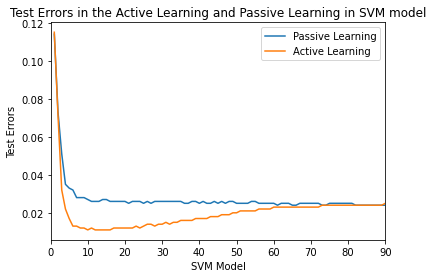

In [48]:
#Plot test errors in the passive learning and active learning                  
k = [i for i in range(1,91)] 

import matplotlib.pyplot as plt 
plt.xlim(0, 90)
plt.plot(k, passive_error, label = 'Passive Learning')
plt.plot(k, active_error, label = 'Active Learning')
plt.xlabel('SVM Model')
plt.ylabel('Test Errors') 
plt.title('Test Errors in the Active Learning and Passive Learning in SVM model')
plt.legend()

### 3 Reference

1. Processing Data
https://scikit-learn.org/stable/modules/preprocessing.html

2. GaussianMixture 
https://scikit-learn.org/stable/modules/generated/sklearn.mixture.GaussianMixture.html

3. SpectralClustering
https://scikit-learn.org/stable/modules/generated/sklearn.cluster.SpectralClustering.html

4. Euclidean_distances 
https://scikit-learn.org/stable/modules/generated/sklearn.metrics.pairwise.euclidean_distances.html

5. KMeans
https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html

6. Semi-Supervised Learning 
https://machinelearningmastery.com/semi-supervised-learning-with-label-propagation/

7. Getting distance of each point from decision boundary
https://stackoverflow.com/questions/32074239/sklearn-getting-distance-of-each-point-from-decision-boundary

8. Avoiding local minima
https://stackoverflow.com/questions/43789602/avoiding-local-minima-when-using-kmeans